In [1]:
import pandas as pd
import unicodedata
import os
import numpy as np
import json

import matplotlib.pyplot as plt

In [2]:
curDir= os.path.abspath(os.getcwd())
housesDf= pd.read_excel(curDir +'\\houseAll.xls', sheet_name = 'house').apply(lambda x: x.str.strip() if x.dtype == "object" else x)

outputHouseAnalysis= curDir +'\\houseAnalysis'

In [3]:
print(len(housesDf))
print(housesDf.columns)

1259
Index(['meta_url', 'meta_code', 'address_street', 'address_ward',
       'address_district', 'address_city', 'price', 'area', 'area_site',
       'area_basebuilt', 'area_netused', 'area_yard', 'area_length',
       'area_width', 'area_front', 'house_noFloor', 'house_type',
       'house_noBasement', 'house_direction', 'in_room_noBed',
       'in_room_noBath', 'in_room_noKitchen', 'in_room_noRelax',
       'in_room_others', 'in_interiorStatus', 'prj_name', 'prj_investor',
       'prj_status', 'prj_tower', 'legal_status', 'other_overview',
       'other_good_outstandingCharacteristics', 'other_good_locationDesc',
       'other_good_community', 'other_good_education', 'overall_info'],
      dtype='object')


In [4]:
print('Danh sách các quận: ')
print(housesDf['address_district'].unique())
print(len(housesDf['address_district'].unique()))
print('\n Số phòng ngủ: ')
print(sorted(housesDf['in_room_noBed'].unique()))

Danh sách các quận: 
['Quận 10' 'Quận 2' 'Quận 9' 'Tân Bình' 'Quận 8' 'Quận 1' 'Gò Vấp'
 'Thủ Đức' 'Quận 4' 'Phú Nhuận' 'Quận 5' 'Bình Thạnh' 'Quận 3' 'Bình Tân'
 'Nhà Bè' 'Quận 12' 'Quận 6' 'Tân Phú' 'Quận 7' 'Hóc Môn' 'Bình Chánh']
21

 Số phòng ngủ: 
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 25]


In [5]:
housesDf.iloc[127]

meta_url                                 https://rever.vn/mua/nha-pho-duong-nguyen-thi-...
meta_code                                                                        T07117431
address_street                                                             Nguyễn Thị Thập
address_ward                                                                    Bình Thuận
address_district                                                                    Quận 7
address_city                                                                   Hồ Chí Minh
price                                                                        17700000000.0
area                                                                                 100.0
area_site                                                                            100.0
area_basebuilt                                                                         NaN
area_netused                                                                         500.0

In [6]:
len(housesDf)

1259

In [7]:
print(housesDf['price'].min())
print(housesDf['price'].max())

1150000000.0
155000000000.0


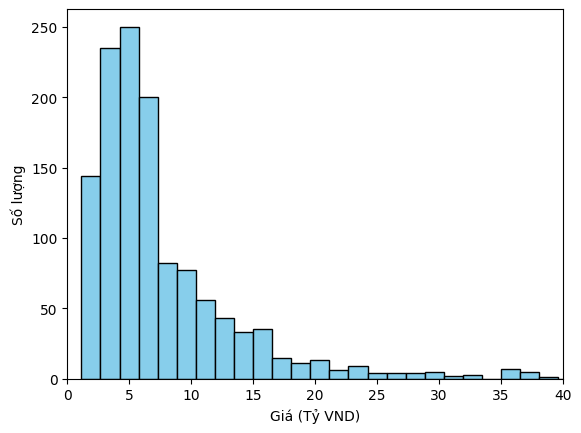

In [8]:
from matplotlib.ticker import FuncFormatter, ScalarFormatter
# Plot a histogram of the 'price' column
plt.hist(housesDf['price'], bins=100, color='skyblue', edgecolor='black')

# Define a custom function for formatting tick labels (dividing by one million)
def price_formatter(x, pos):
    y=x/1000000000
    return f'{y:.0f}'

# Apply the custom formatter to the y-axis
plt.gca().xaxis.set_major_formatter(FuncFormatter(price_formatter))

# Disable scientific notation on the y-axis
# plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=False))

# Set x-axis limits to focus on the desired range
plt.xlim(0e9, 40e9)

# Set labels and title
plt.xlabel('Giá (Tỷ VND)')
plt.ylabel('Số lượng')
# plt.title('Distribution of Prices (Scaled to Millions)')
# Save the plot as an image (e.g., PNG)
plt.savefig('houseAnalysis\houseByPrice.png', format='png', bbox_inches='tight')
# Show the plot
plt.show()

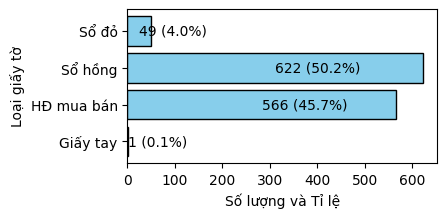

In [9]:
# Calculate count and percentage
count_data = housesDf['legal_status'].value_counts().sort_index()
percentage_data = housesDf['legal_status'].value_counts(normalize=True).sort_index() * 100

# Create a figure with a single horizontal bar chart (A4 landscape size)
fig, ax = plt.subplots(figsize=(4, 2))  # A4 size in inches (11.7 x 8.3)

# Plot count and percentage on a single bar chart
combined_labels = [f'{value} ({percentage:.1f}%)' for value, percentage in zip(count_data, percentage_data)]
bars = ax.barh(range(len(count_data)), count_data, color='skyblue', edgecolor='black', label='Count and Percentage')

# Set labels and title
# ax.set_xlabel('Count and Percentage')
ax.set_ylabel('Loại giấy tờ')
ax.set_xlabel('Số lượng và Tỉ lệ')
ax.set_yticks(range(len(count_data)))  # Adjust y-ticks to correspond to bars
ax.set_yticklabels(count_data.index)   # Set y-tick labels to correspond to values
# ax.set_title('Count and Percentage by Room')

# Display combined count and percentage values on the bars
for bar, label in zip(bars, combined_labels):
    width = bar.get_width()
    ax.text(width / 2, bar.get_y() + bar.get_height() / 2, label, va='center', ha='left')

#     ax.text(width + 0.1, bar.get_y() + bar.get_height() / 2, label, va='center')

# # Adjust x-axis limits and set a margin
# margin = 30  # Adjust this value to suit your needs
# ax.set_xlim(right=max(count_data) + margin)

# Adjust layout to prevent clipping of the title
# plt.tight_layout()

# Save the plot as an image (e.g., PNG)
plt.savefig('houseAnalysis\houseByLegal.png', format='png', bbox_inches='tight')

# Show the plot
plt.show()

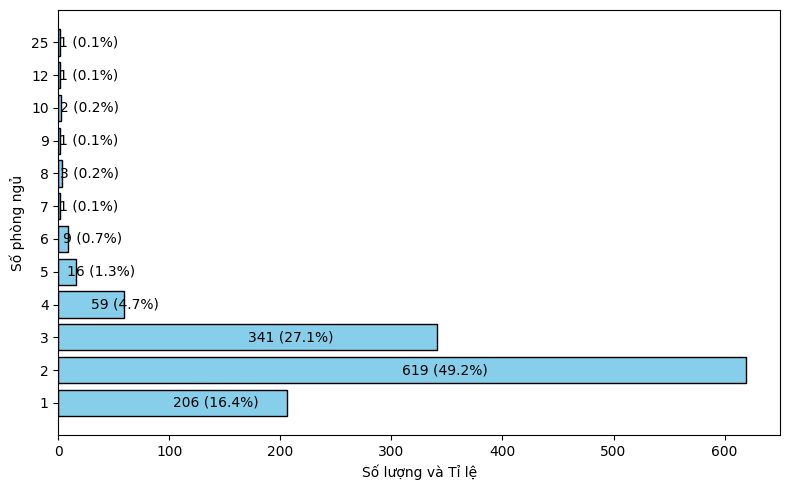

In [10]:
# Calculate count and percentage
count_data = housesDf['in_room_noBed'].value_counts().sort_index()
percentage_data = housesDf['in_room_noBed'].value_counts(normalize=True).sort_index() * 100

# Create a figure with a single horizontal bar chart (A4 landscape size)
fig, ax = plt.subplots(figsize=(8, 5))  # A4 size in inches (11.7 x 8.3)

# Plot count and percentage on a single bar chart
combined_labels = [f'{value} ({percentage:.1f}%)' for value, percentage in zip(count_data, percentage_data)]
bars = ax.barh(range(len(count_data)), count_data, color='skyblue', edgecolor='black', label='Count and Percentage')

# Set labels and title
ax.set_xlabel('Số lượng và Tỉ lệ')
ax.set_ylabel('Số phòng ngủ')
ax.set_yticks(range(len(count_data)))  # Adjust y-ticks to correspond to bars
ax.set_yticklabels(count_data.index)   # Set y-tick labels to correspond to values
# ax.set_title('Count and Percentage by Room')

# Display combined count and percentage values on the bars
for bar, label in zip(bars, combined_labels):
    width = bar.get_width()
    ax.text(width / 2, bar.get_y() + bar.get_height() / 2, label, va='center', ha='left')

#     ax.text(width + 0.1, bar.get_y() + bar.get_height() / 2, label, va='center')

# # Adjust x-axis limits and set a margin
# margin = 30  # Adjust this value to suit your needs
# ax.set_xlim(right=max(count_data) + margin)

# Adjust layout to prevent clipping of the title
plt.tight_layout()

# Save the plot as an image (e.g., PNG)
plt.savefig('houseAnalysis\houseByNoBedroom.png', format='png', bbox_inches='tight')

# Show the plot
plt.show()

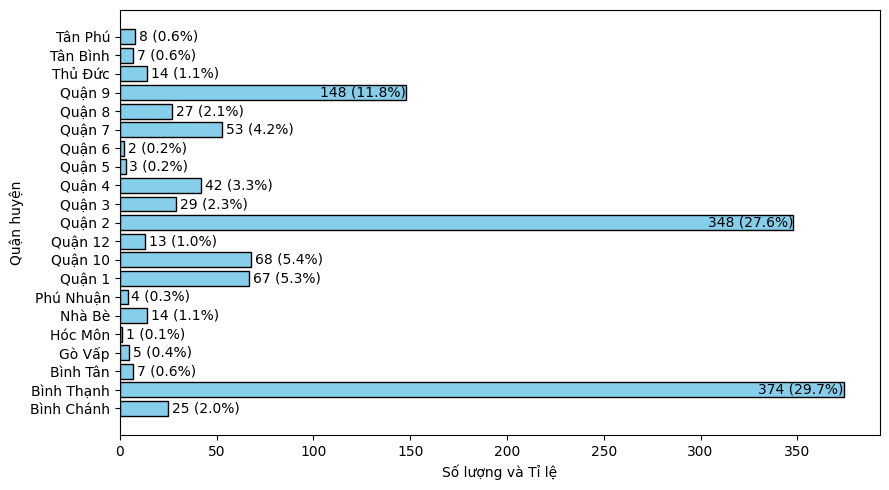

In [11]:
# Calculate count and percentage
count_data = housesDf['address_district'].value_counts().sort_index()
percentage_data = housesDf['address_district'].value_counts(normalize=True).sort_index() * 100

# Create a figure with a single horizontal bar chart (A4 landscape size)
fig, ax = plt.subplots(figsize=(9, 5))  # A4 size in inches (11.7 x 8.3)

# Plot count and percentage on a single bar chart
combined_labels = [f'{value} ({percentage:.1f}%)' for value, percentage in zip(count_data, percentage_data)]
bars = ax.barh(range(len(count_data)), count_data, color='skyblue', edgecolor='black', label='Count and Percentage')

# Set labels and title
# ax.set_xlabel('Count and Percentage')
ax.set_xlabel('Số lượng và Tỉ lệ')
ax.set_ylabel('Quận huyện')
ax.set_yticks(range(len(count_data)))  # Adjust y-ticks to correspond to bars
ax.set_yticklabels(count_data.index)   # Set y-tick labels to correspond to values
# ax.set_title('Count and Percentage by Room')

# Display combined count and percentage values on the bars
for bar, label in zip(bars, combined_labels):
#     width = bar.get_width()
#     ax.text(width / 2, bar.get_y() + bar.get_height() / 2, label, va='center')
    width = bar.get_width()
    percentage = float(label.split("(")[1].split("%")[0])
#     print(percentage)
    if percentage > 10:
        ax.text(width, bar.get_y() + bar.get_height() / 2, label, va='center', ha='right')
    else:
        ax.text(width + 2, bar.get_y() + bar.get_height() / 2, label, va='center')

# # Adjust x-axis limits and set a margin
# margin = 30  # Adjust this value to suit your needs
# ax.set_xlim(right=max(count_data) + margin)

# Adjust layout to prevent clipping of the title
plt.tight_layout()

# Save the plot as an image (e.g., PNG)
plt.savefig('houseAnalysis\houseByDistrict.png', format='png', bbox_inches='tight')

# Show the plot
plt.show()

In [12]:
# # Calculate count and percentage
# count_data = housesDf['address_district'].value_counts().sort_index()
# percentage_data = housesDf['address_district'].value_counts(normalize=True).sort_index() * 100

# # Create a figure with two subplots (1 row, 2 columns)
# fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# # Plot count
# count_data.plot(kind='barh', ax=axes[0], color='skyblue', edgecolor='black')
# # axes[0].set_title('Count by Room')
# axes[0].set_xlabel('Số lượng')
# axes[0].set_ylabel('Số lượng phòng ngủ')

# # Display count values on the bars
# for i, value in enumerate(count_data):
#     axes[0].text(value + 0.1, i, str(value), va='center')

# # Plot percentage
# percentage_data.plot(kind='barh', ax=axes[1], color='orange', edgecolor='black')
# # axes[1].set_title('Percentage by Room')
# axes[1].set_xlabel('Tỉ lệ')
# axes[1].set_ylabel('')

# # Display percentage values on the bars
# for i, value in enumerate(percentage_data):
#     axes[1].text(value + 0.1, i, f'{value:.1f}%', va='center')

# # Adjust layout to prevent clipping of titles
# plt.tight_layout()

# # Save plot
# # plt.savefig('houseAnalysis\houseByNoBedroom.png')# Show the plots
# plt.show()

In [13]:
# # Calculate count and percentage
# count_data = housesDf['address_district'].value_counts().sort_index()
# percentage_data = housesDf['address_district'].value_counts(normalize=True).sort_index() * 100

# # Create a figure with two subplots (1 row, 2 columns)
# fig, ax = plt.subplots(figsize=(10, 6))  # A4 size in inches (11.7 x 8.3)

# # Plot count and percentage on a single bar chart
# combined_labels = [f'{value} ({percentage:.1f}%)' for value, percentage in zip(count_data, percentage_data)]
# ax.barh(count_data.index, count_data, color='skyblue', edgecolor='black', label='Count and Percentage')

# # Set labels and title
# ax.set_xlabel('Số lượng và Tỉ lệ')
# # ax.set_title('Count and Percentage by Room')

# # Display combined count and percentage values on the bars
# for i, label in enumerate(combined_labels):
# #     print(i, '-', label,'+', count_data[i])
#     percentage = float(percentage_data[i])
# #     print(percentage)
#     if percentage > 10:
#         ax.text(count_data[i] + 0.1, i, label, va='center', ha='right')
#     else:
#         ax.text(count_data[i] + 0.1, i, label, va='center')
# #     ax.text(count_data[i] + 0.1, i, label, va='center')

# # Adjust layout to prevent clipping of the title
# plt.tight_layout()

# # Save the plot as an image (e.g., PNG)
# plt.savefig('houseAnalysis\houseByDistrict.png', format='png', bbox_inches='tight')

# # Show the plot
# plt.show()

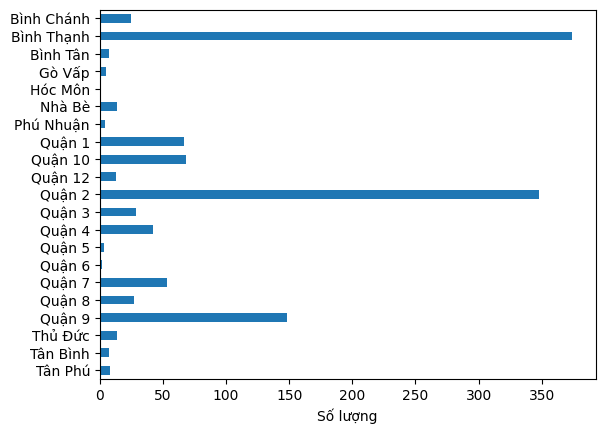

In [14]:
# Define a custom sorting function
def sort_district(address_district):
    # Extract the numerical part of the district name and convert to int
    num_part = ''.join(filter(str.isdigit, address_district))
    return int(num_part)

# Sort the DataFrame using the custom sorting function
# df_districtSorted = housesDf['address_district'].sort_values(key=sort_district)

# ax=df_districtSorted['address_district'].value_counts().sort_index(ascending=False).plot(kind='barh')
ax=housesDf['address_district'].value_counts().sort_index(ascending=False).plot(kind='barh')
# Set labels and title
plt.xlabel('Số lượng')
# plt.ylabel('Số lượng')
# plt.title('Số ')
# Hide y-axis labels
ax.set_ylabel('')
# Show the plot
plt.savefig('houseAnalysis\sampleHouse_byDistrict.png')
plt.show()

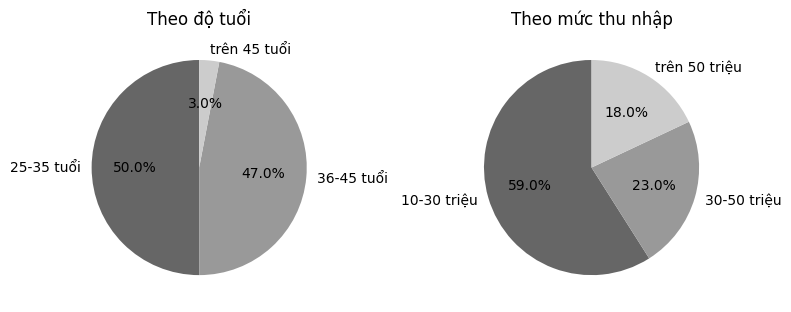

In [15]:
# Data for the first circle (50-47-3)
sizes_circle1 = [50, 47, 3]
labels_circle1 = ['25-35 tuổi', '36-45 tuổi', 'trên 45 tuổi']

# Data for the second circle (59-23-18)
sizes_circle2 = [59, 23, 18]
labels_circle2 = ['10-30 triệu', '30-50 triệu', 'trên 50 triệu']

# Create subplots with two circles
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

# Plot the first circle
axs[0].pie(sizes_circle1, labels=labels_circle1, autopct='%1.1f%%', startangle=90, colors=['#666666', '#999999', '#CCCCCC'])
axs[0].set_title('Theo độ tuổi')

# Plot the second circle
axs[1].pie(sizes_circle2, labels=labels_circle2, autopct='%1.1f%%', startangle=90, colors=['#666666', '#999999', '#CCCCCC'])
axs[1].set_title('Theo mức thu nhập')

# Adjust layout
plt.tight_layout()

plt.savefig('houseAnalysis\custDistribution.png')

# Show the plot
plt.show()